<a href="https://colab.research.google.com/github/ArshockAbedan/ML2021/blob/main/Training_and_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basics of Machine Learning

In [26]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.losses as losses
import tensorflow.keras.optimizers as optimizers 
import tensorflow.keras.datasets as datasets
from keras.datasets import mnist

In [50]:
import numpy as np
import matplotlib.pyplot as pl

In [51]:
data = tf.keras.datasets.mnist.load_data()

In [52]:
# By defualt, the data is already split into training and testing data
train_data, test_data = data


In [53]:
# Data consists of one tensor for the images, and another tensor for the labels.
x_train, y_train = train_data
x_test, y_test = test_data

# we will randomized the data into 0-1
x_train = x_train / 255
x_test = x_test / 255

print('The shape of x_train which are the images is', x_train.shape)
print('The shape of y_train which are the labels is', y_train.shape)

The shape of x_train which are the images is (60000, 28, 28)
The shape of y_train which are the labels is (60000,)


<Figure size 720x720 with 0 Axes>

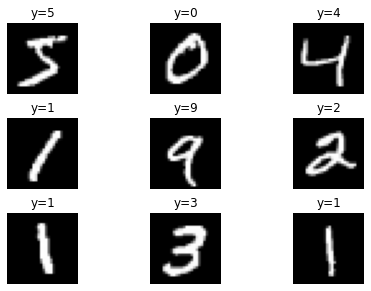

In [54]:
# We can inspect the dataset by plotting some of the image, and their labels.
def show_images(k, x, y=None):
  pl.figure(figsize=(10,10))
  pl.subplots(k, k)
  pl.tight_layout(pad=0.3)
  for i in range(k*k):
    image = x[i]
    pl.subplot(k, k, i+1)
    pl.imshow(image, cmap='gray')
    pl.axis('off')
    if y is not None:
      pl.title("y=%s" % y[i])

show_images(3, x_train, y_train)

<Figure size 720x720 with 0 Axes>

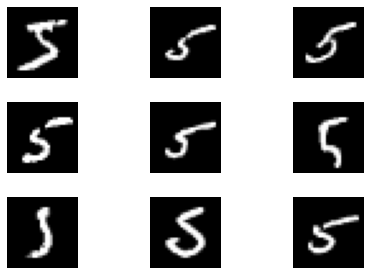

In [60]:
# We can also use NumPy to handpick images with a particular label.

mask_5 = y_train == 5
show_images(3, x_train[mask_5])

Model

In [62]:
model = models.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Reshape((784,)),
    layers.Dense(10, activation='softmax'),
])

In [65]:
model.compile(
    optimizer=optimizers.Adam(0.1),
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=['acc'],
)

Training

In [67]:
model.fit(x_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 1s 1ms/step - loss: 1.3311 - acc: 0.8885
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 1.2811 - acc: 0.8929
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 1.3142 - acc: 0.8925
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 1.3280 - acc: 0.8914
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 1.3369 - acc: 0.8922
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 1.3751 - acc: 0.8938
Epoch 7/10
938/938 [==============================] - 1s 1ms/step - loss: 1.3639 - acc: 0.8932
Epoch 8/10
938/938 [==============================] - 1s 1ms/step - loss: 1.3467 - acc: 0.8942
Epoch 9/10
938/938 [==============================] - 1s 1ms/step - loss: 1.3101 - acc: 0.8957
Epoch 10/10
938/938 [==============================] - 1s 2ms/step - loss: 1.3142 - acc: 0.8962


Testing

In [68]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.5134 - acc: 0.8990


[1.513425350189209, 0.8989999890327454]

**Observation**

The model achieved similar accuracy for both the training data and the test data.

This suggests that the model did not develop any bias during training.


**Prediction**

After training and validation, the model can be used like any function in your program.

**Cross digit similarity**

Let's consider a problem of finding which other digit is generally more similar to the digit **3**.

We solve this using the model by looking for the digit that is most often misidentified as **3**.

In [71]:
def misclassify(x, y, source_digit, target_digit):
  mask = y == source_digit
  z = model.predict(x[mask])
  y_pred = np.argmax(z, axis=1)
  return np.sum(y_pred==target_digit) / y_pred.shape[0] * 100

In [72]:
misclassify(x_test, y_test, 8, 3)

2.8747433264887063

In [73]:
sorted([(misclassify(x_test, y_test, i, 3), i) for i in range(10)], reverse=1)

[(88.61386138613861, 3),
 (6.053811659192825, 5),
 (2.8747433264887063, 8),
 (1.3565891472868217, 2),
 (0.8919722497522299, 9),
 (0.5836575875486382, 7),
 (0.30612244897959184, 0),
 (0.20876826722338201, 6),
 (0.20366598778004072, 4),
 (0.1762114537444934, 1)]

**Worst hand-written digits**

We can use the model to identiy the **worst** digits.

This is done by looking at the samples where the model assigns low probability to the true label.

In [74]:
def worst_digits(x, y, digit, top_k):
    mask = y == digit
    z = model.predict(x[mask])
    J = np.argsort(z[:, digit])
    return x[mask][J][:top_k]

<Figure size 720x720 with 0 Axes>

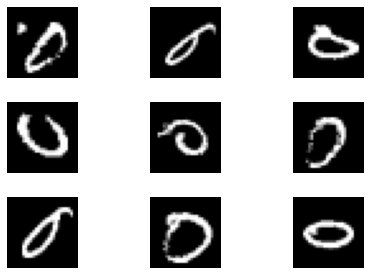

In [75]:
k = 3
digit = 0
x_worst = worst_digits(x_test, y_test, 0, k*k)
show_images(k, x_worst)